<a href="https://colab.research.google.com/github/brijesh8nov/machine-learning/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#use WGET to get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-16 12:14:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-16 12:14:50 (47.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!ls

moore.csv  sample_data


In [0]:
#load the data using pandas
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

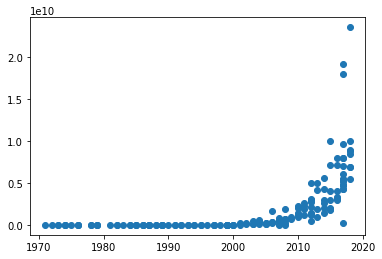

In [13]:
#scatter plot the data, the data is exponential
plt.scatter(X,Y)

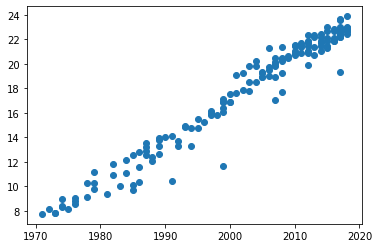

In [14]:
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
#cetner the data
X = X - X.mean()


In [24]:
#tensorflow
#model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

#compile
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

#learning rate scheduler
def schedule(epoch, ltr):
  if epoch >= 50:
    return 0.0001
  return 0.001

#Scheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])



Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 563.6620 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 325.8123 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 261.3133 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 208.5241 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 157.1115 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 124.3402 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 99.2247 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 81.7242 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 83.2241 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 59.4252 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 4

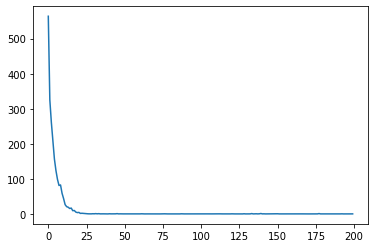

In [25]:
#plot the loss function
plt.plot(r.history['loss'], label='loss')

In [28]:
print (model.layers)
print (model.layers[0].get_weights())

[array([[0.33592469]], dtype=float32), array([17.768623], dtype=float32)]


In [0]:
#The slope of the line is 
a = model.layers[0].get_weights()[0][0,0]

In [31]:
#print time to double
print("Time to Double:", np.log(2)/a)

Time to Double: 2.063400552290796
